In [1]:
import pandas as pd
import kaggle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import zipfile

## EDA

In [2]:
# Download the dataset from Kaggle
!kaggle datasets download -d tanayatipre/store-sales-forecasting-dataset

Dataset URL: https://www.kaggle.com/datasets/tanayatipre/store-sales-forecasting-dataset
License(s): Apache 2.0
store-sales-forecasting-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
# Extract the dataset from the downloaded zip file
zip_name = 'store-sales-forecasting-dataset.zip'
with zipfile.ZipFile(zip_name, 'r') as file:
    file.extractall()

In [4]:
# Load the dataset into a DataFrame
df = pd.read_csv('stores_sales_forecasting.csv', encoding='ISO-8859-1')

In [5]:
# Check the shape of the dataset
print(df.shape)

(2121, 21)


In [6]:

# Display the first rows
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   

     Customer Name   Segment        Country             City  ... Postal Code  \
0      Claire Gute  Consumer  United States        Henderson  ...       42420   
1      Claire Gute  Consumer  United States        Henderson  ...       42420   
2   Sean O'Donnell  Consumer  United States  Fort Lauderdale  ...       33311   
3  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   
4  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   

   Region       Product ID

In [7]:
# Strip whitespace from column names and standardize to lowercase with underscores
df.columns = df.columns.str.strip()
new_cols = {col: col.lower().translate(str.maketrans(' -', '__')) for col in df.columns}
df.rename(columns=new_cols, inplace=True)
print(df.columns)

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')


In [8]:
# Check for missing values
print(df.isnull().sum())

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64


In [9]:
# Remove duplicate rows from the dataset
df.drop_duplicates(inplace=True)

In [10]:
# Display information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         2121 non-null   int64  
 1   order_id       2121 non-null   object 
 2   order_date     2121 non-null   object 
 3   ship_date      2121 non-null   object 
 4   ship_mode      2121 non-null   object 
 5   customer_id    2121 non-null   object 
 6   customer_name  2121 non-null   object 
 7   segment        2121 non-null   object 
 8   country        2121 non-null   object 
 9   city           2121 non-null   object 
 10  state          2121 non-null   object 
 11  postal_code    2121 non-null   int64  
 12  region         2121 non-null   object 
 13  product_id     2121 non-null   object 
 14  category       2121 non-null   object 
 15  sub_category   2121 non-null   object 
 16  product_name   2121 non-null   object 
 17  sales          2121 non-null   float64
 18  quantity

In [11]:
# Convert 'order_date' and 'ship_date' columns to datetime
df['order_date'] = pd.to_datetime(df['order_date'], format='%m/%d/%Y')
df['ship_date'] = pd.to_datetime(df['ship_date'], format='%m/%d/%Y')

In [12]:
# Create a new column for year-month period from 'order_date'
df['order_year_month'] = df['order_date'].dt.to_period('M')
df['order_year_month'] = df['order_year_month'].dt.strftime('%Y-%m')
df['order_year_month'] = pd.to_datetime(df['order_year_month'], format='%Y-%m')

In [13]:
# Summary statistics for numerical columns
print(df.describe())

            row_id                     order_date  \
count  2121.000000                           2121   
mean   5041.643564  2016-04-30 03:54:13.748231680   
min       1.000000            2014-01-06 00:00:00   
25%    2568.000000            2015-05-26 00:00:00   
50%    5145.000000            2016-06-20 00:00:00   
75%    7534.000000            2017-05-14 00:00:00   
max    9991.000000            2017-12-30 00:00:00   
std    2885.740258                            NaN   

                           ship_date   postal_code        sales     quantity  \
count                           2121   2121.000000  2121.000000  2121.000000   
mean   2016-05-04 01:54:44.299858432  55726.556341   349.834887     3.785007   
min              2014-01-10 00:00:00   1040.000000     1.892000     1.000000   
25%              2015-05-31 00:00:00  22801.000000    47.040000     2.000000   
50%              2016-06-23 00:00:00  60505.000000   182.220000     3.000000   
75%              2017-05-18 00:00:00  9003

In [14]:
# Group daily sales data
daily_sales = df.groupby('order_date')['sales'].sum().reset_index()
print(daily_sales)

    order_date      sales
0   2014-01-06  2573.8200
1   2014-01-07    76.7280
2   2014-01-10    51.9400
3   2014-01-11     9.9400
4   2014-01-13   879.9390
..         ...        ...
884 2017-12-24  1393.4940
885 2017-12-25   832.4540
886 2017-12-28   551.2568
887 2017-12-29  2330.7180
888 2017-12-30   323.1360

[889 rows x 2 columns]


In [15]:
# Group monthly sales data
monthly_sales = df.groupby('order_year_month')['sales'].sum().reset_index()
print(monthly_sales)

   order_year_month       sales
0        2014-01-01   6242.5250
1        2014-02-01   1839.6580
2        2014-03-01  14573.9560
3        2014-04-01   7944.8370
4        2014-05-01   6912.7870
5        2014-06-01  13206.1256
6        2014-07-01  10821.0510
7        2014-08-01   7320.3465
8        2014-09-01  23816.4808
9        2014-10-01  12304.2470
10       2014-11-01  21564.8727
11       2014-12-01  30645.9665
12       2015-01-01  11739.9416
13       2015-02-01   3134.3740
14       2015-03-01  12499.7830
15       2015-04-01  10475.6985
16       2015-05-01   9374.9505
17       2015-06-01   7714.1790
18       2015-07-01  13674.4200
19       2015-08-01   9638.5922
20       2015-09-01  26273.0230
21       2015-10-01  12026.6235
22       2015-11-01  30880.8325
23       2015-12-01  23085.8192
24       2016-01-01   7622.7430
25       2016-02-01   3925.5510
26       2016-03-01  12801.0920
27       2016-04-01  13212.0900
28       2016-05-01  15119.8350
29       2016-06-01  13070.5720
30      

In [16]:
# Calculate monthly average sales
monthly_avg_sales = df.groupby('order_year_month')['sales'].mean()
print(monthly_avg_sales)

order_year_month
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
2014-06-01    440.204187
2014-07-01    327.910636
2014-08-01    305.014437
2014-09-01    425.294300
2014-10-01    384.507719
2014-11-01    347.820527
2014-12-01    414.134682
2015-01-01    782.662773
2015-02-01    284.943091
2015-03-01    446.420821
2015-04-01    317.445409
2015-05-01    312.498350
2015-06-01    296.699192
2015-07-01    341.860500
2015-08-01    301.206006
2015-09-01    437.883717
2015-10-01    334.072875
2015-11-01    401.049773
2015-12-01    360.715925
2016-01-01    346.488318
2016-02-01    206.607947
2016-03-01    312.221756
2016-04-01    377.488286
2016-05-01    351.624070
2016-06-01    343.962421
2016-07-01    335.090231
2016-08-01    430.456286
2016-09-01    328.468445
2016-10-01    247.345354
2016-11-01    392.390479
2016-12-01    436.651369
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-

In [17]:
# Calculate average profit by subcategory
sub_cat_profit = df.groupby('sub_category')['profit'].mean()
print(sub_cat_profit)

sub_category
Bookcases     -15.230509
Chairs         43.095894
Furnishings    13.645918
Tables        -55.565771
Name: profit, dtype: float64


In [18]:
# Convert 'discount' to float and calculate 'cost'
df['discount'] = df['discount'].astype(float)
df['cost'] = df['sales'] * (1 - df['discount']) - df['profit']
print(df[['sales', 'quantity', 'profit', 'discount', 'cost']].head())

       sales  quantity    profit  discount         cost
0   261.9600         2   41.9136      0.00   220.046400
1   731.9400         3  219.5820      0.00   512.358000
2   957.5775         5 -383.0310      0.45   909.698625
3    48.8600         7   14.1694      0.00    34.690600
4  1706.1840         9   85.3092      0.20  1279.638000


In [19]:
# Calculate total sales as the product of sales and quantity
df['total_sales'] = df['sales'] * df['quantity']
print(df[['sales', 'quantity', 'total_sales', 'cost', 'discount']].head())

       sales  quantity  total_sales         cost  discount
0   261.9600         2     523.9200   220.046400      0.00
1   731.9400         3    2195.8200   512.358000      0.00
2   957.5775         5    4787.8875   909.698625      0.45
3    48.8600         7     342.0200    34.690600      0.00
4  1706.1840         9   15355.6560  1279.638000      0.20


## Visualization

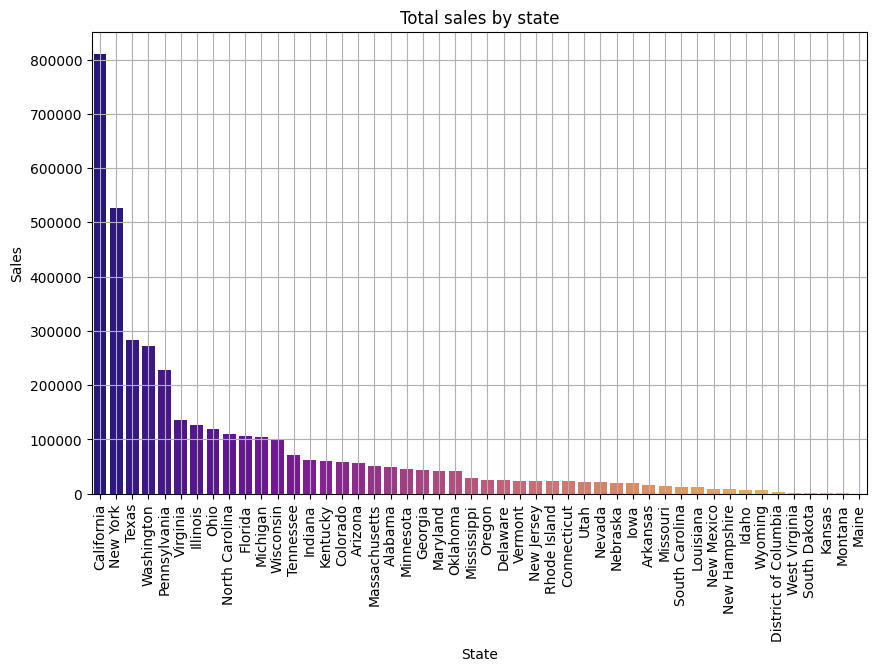

In [20]:
# Total sales by state, sorted and plotted
state_sales = df.groupby('state')['total_sales'].sum().reset_index()
state_sales = state_sales.sort_values(by='total_sales', ascending=False)
state_sales['state'] = pd.Categorical(state_sales['state'], categories=state_sales['state'], ordered=True)
plt.figure(figsize=(10,6))
sns.barplot(x='state', y='total_sales', data=state_sales, palette='plasma', hue='state', dodge=None, estimator=sum)
plt.title('Total sales by state')
plt.xlabel('State')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

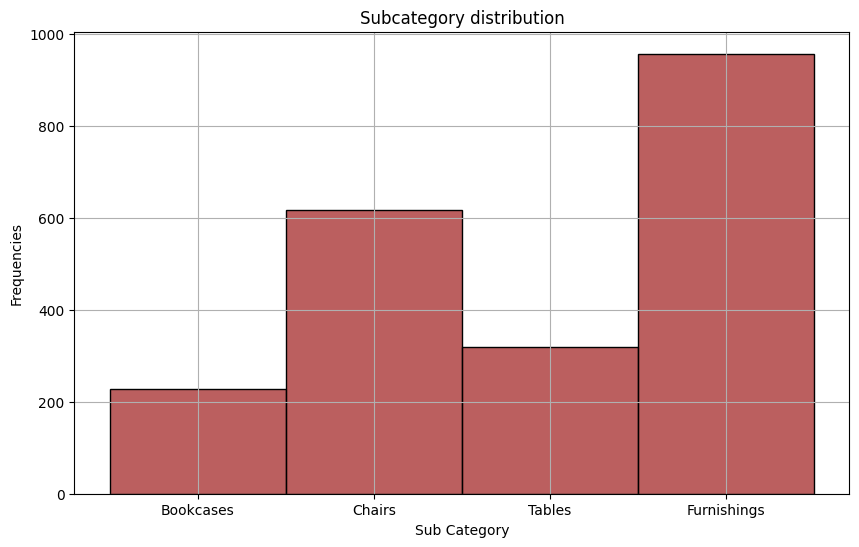

In [21]:
# Distribution of subcategories in the dataset
plt.figure(figsize=(10,6))
sns.histplot(df['sub_category'], bins=5, color='brown')
plt.title('Subcategory distribution')
plt.xlabel('Sub Category')
plt.ylabel('Frequencies')
plt.grid(True)
plt.show()

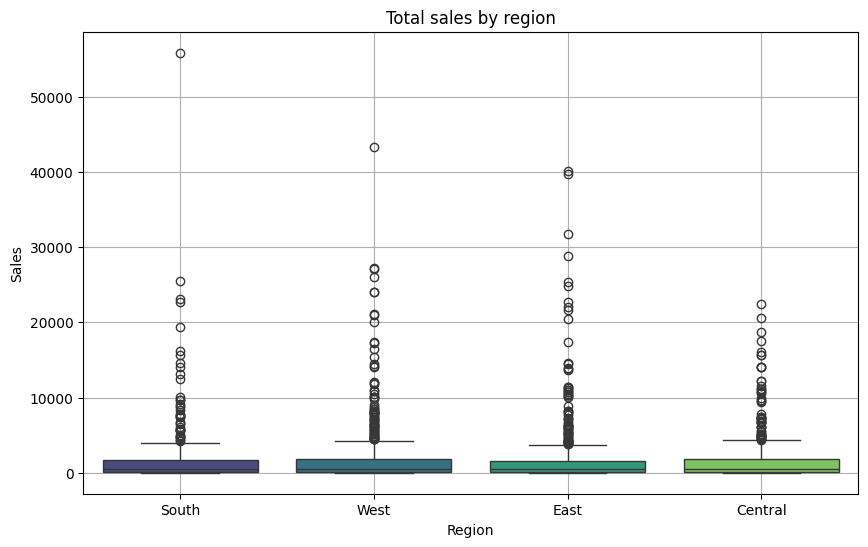

In [22]:
# Total sales by region using a boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='region', y='total_sales', data=df, palette='viridis', hue='region', dodge=None)
plt.title('Total sales by region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

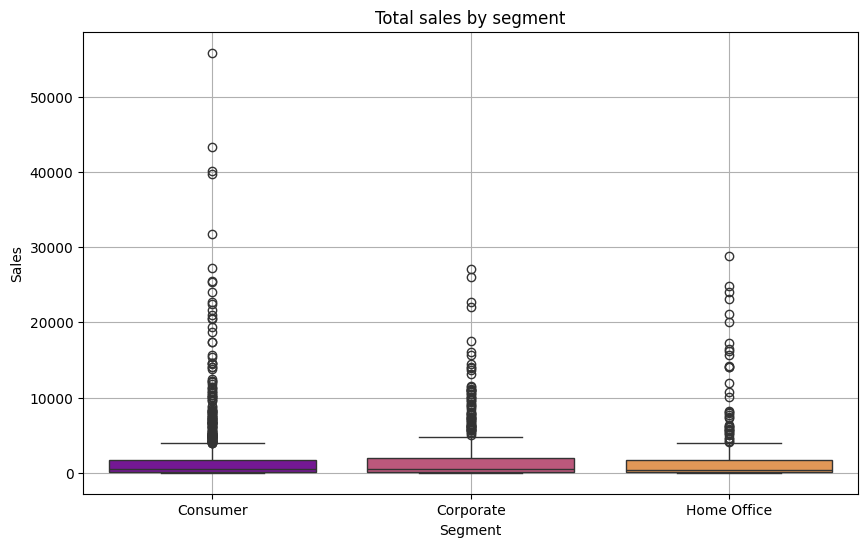

In [23]:
# Total sales by segment using a boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='segment', y='total_sales', data=df, palette='plasma', hue='segment', dodge=None)
plt.title('Total sales by segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

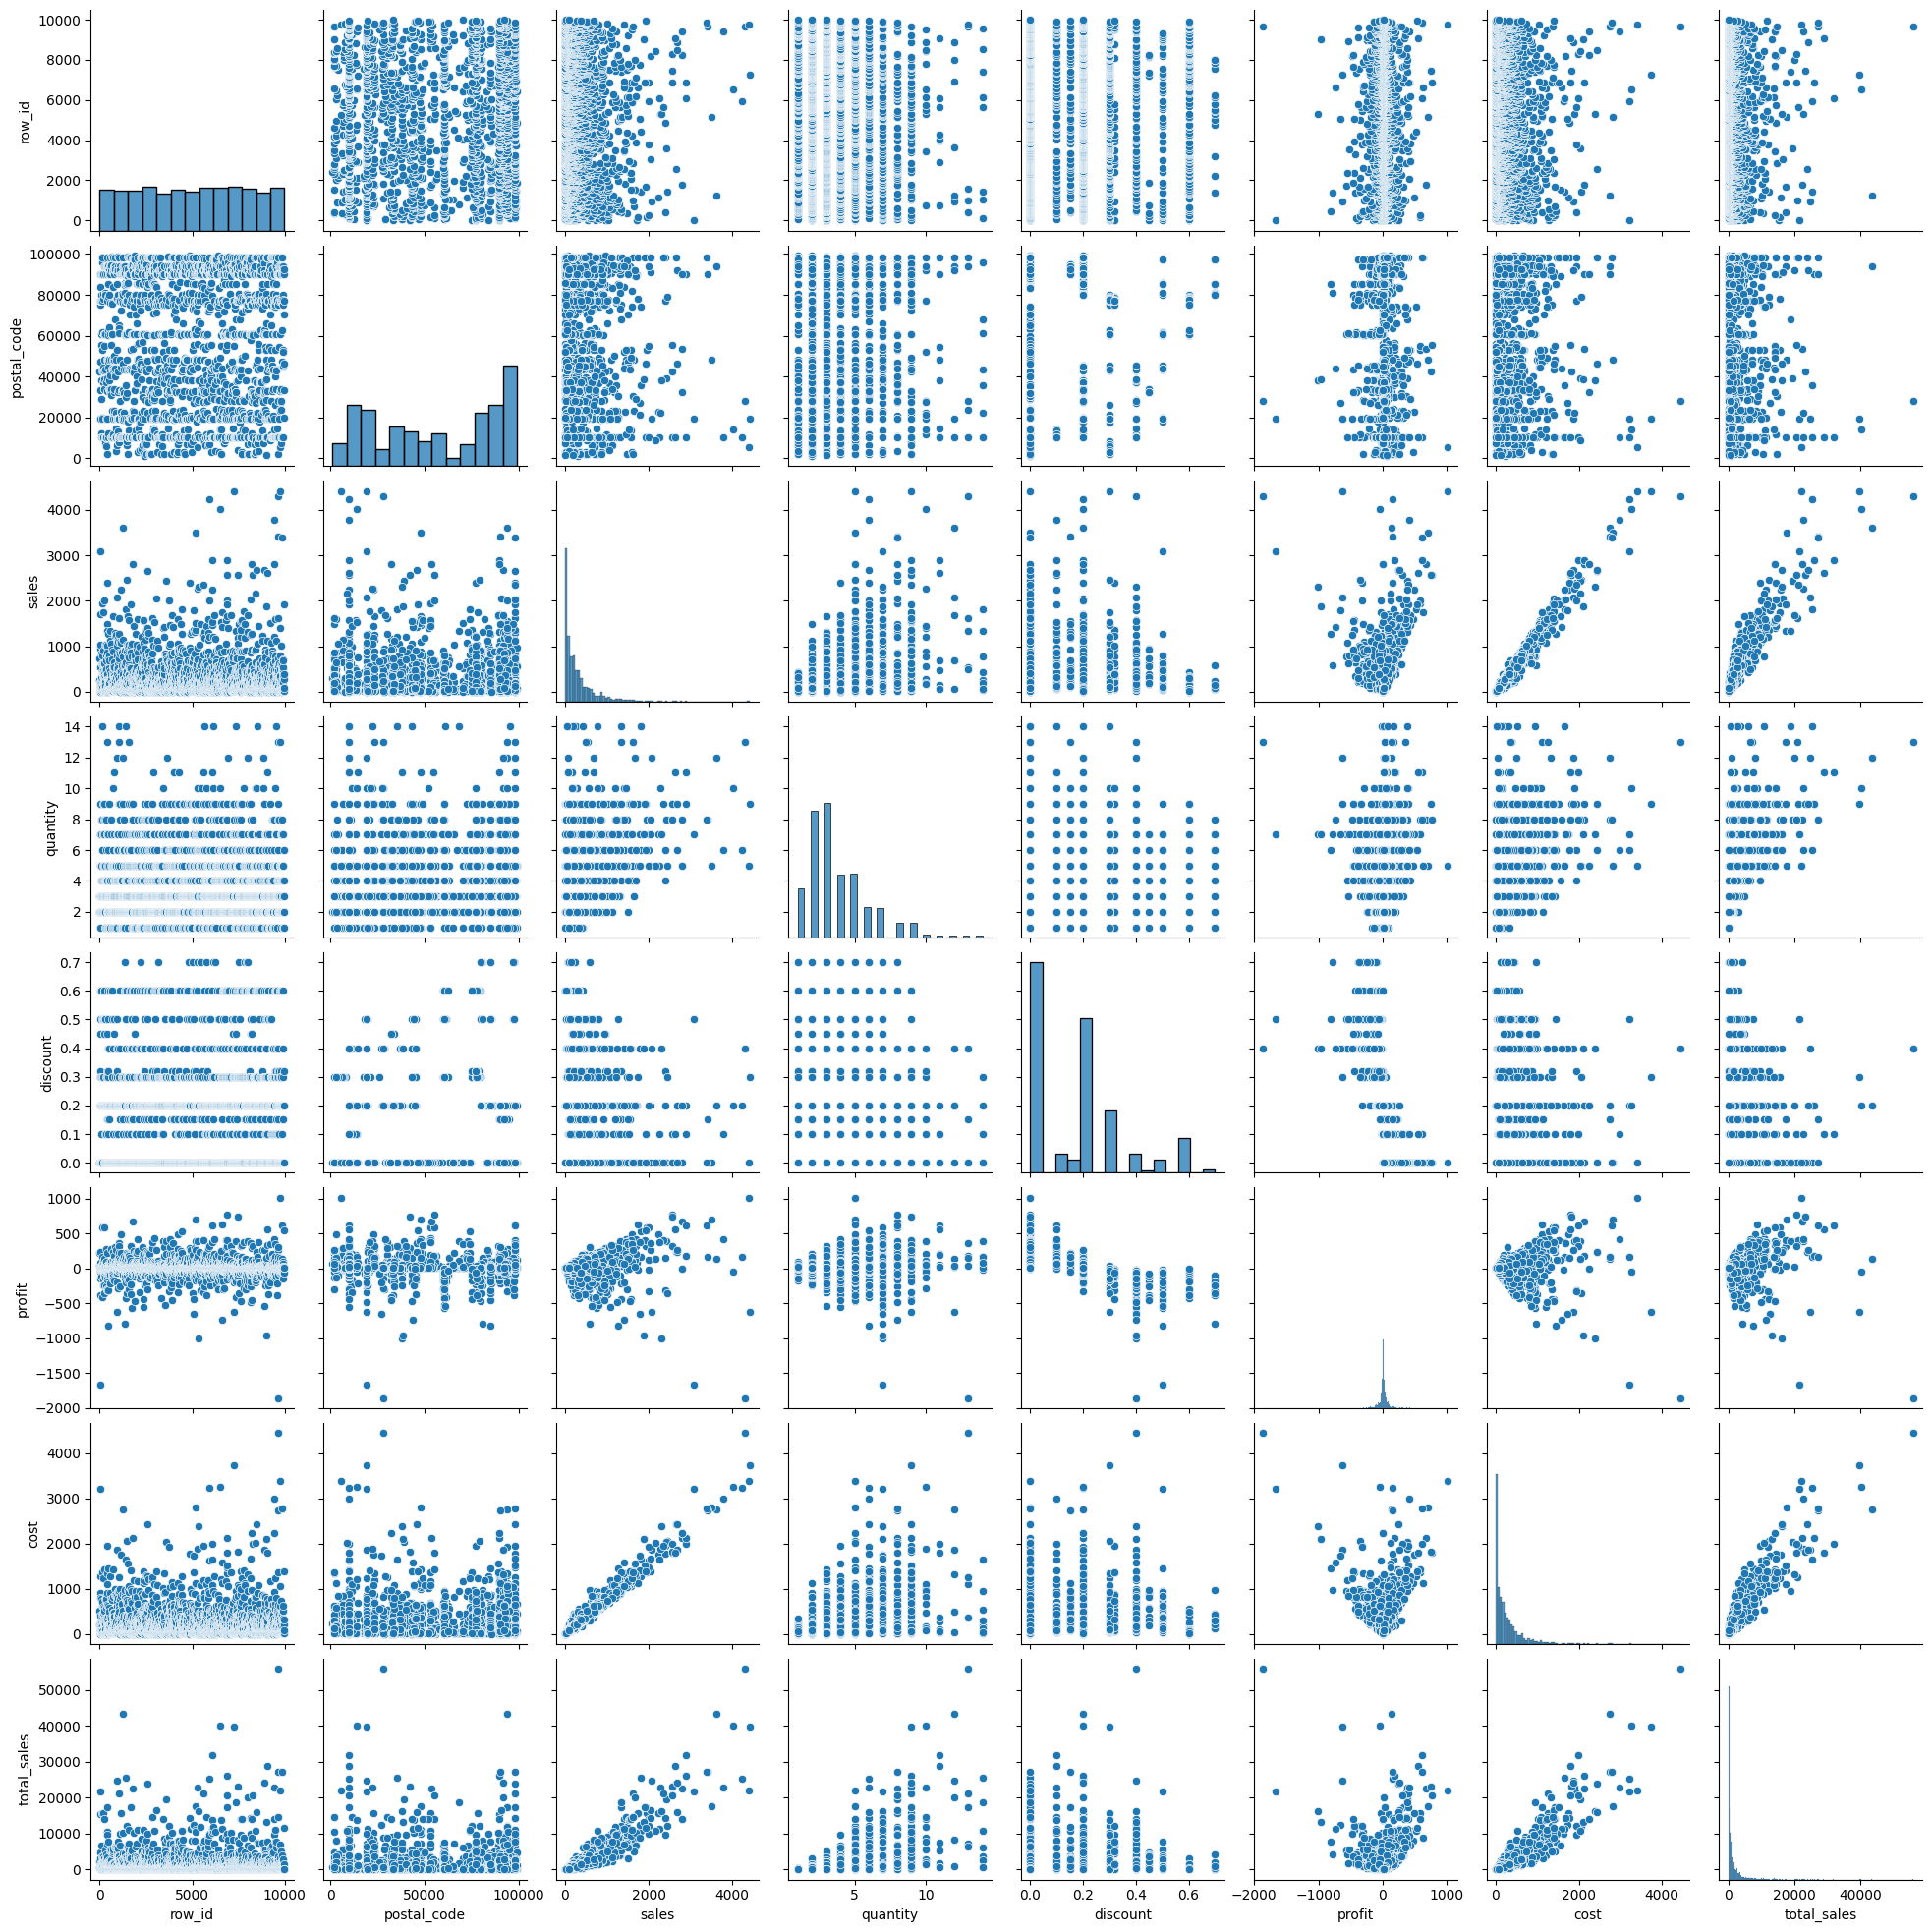

In [24]:
# Pairplot of all numerical features in the dataset
plt.figure(figsize=(10,6))
sns.pairplot(df)
plt.show()

In [26]:
# Correlation matrix of numerical features
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

               row_id  postal_code     sales  quantity  discount    profit  \
row_id       1.000000     0.017164  0.001696 -0.000246  0.031848  0.008775   
postal_code  0.017164     1.000000 -0.011786  0.013700  0.106736 -0.026335   
sales        0.001696    -0.011786  1.000000  0.437464 -0.028576  0.173510   
quantity    -0.000246     0.013700  0.437464  1.000000 -0.015695  0.061213   
discount     0.031848     0.106736 -0.028576 -0.015695  1.000000 -0.483769   
profit       0.008775    -0.026335  0.173510  0.061213 -0.483769  1.000000   
cost         0.001536    -0.011317  0.986434  0.433085  0.024301  0.038806   
total_sales  0.009518    -0.018356  0.915884  0.572384 -0.027348  0.113381   

                 cost  total_sales  
row_id       0.001536     0.009518  
postal_code -0.011317    -0.018356  
sales        0.986434     0.915884  
quantity     0.433085     0.572384  
discount     0.024301    -0.027348  
profit       0.038806     0.113381  
cost         1.000000     0.910422  
t

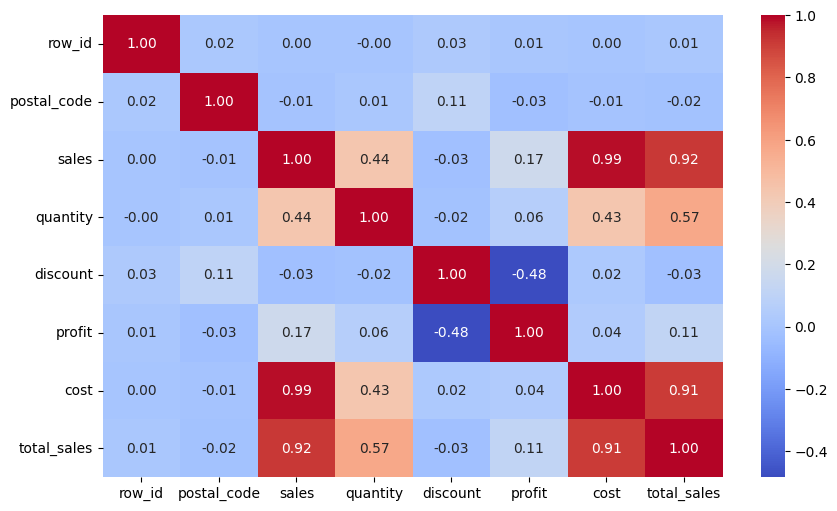

In [27]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

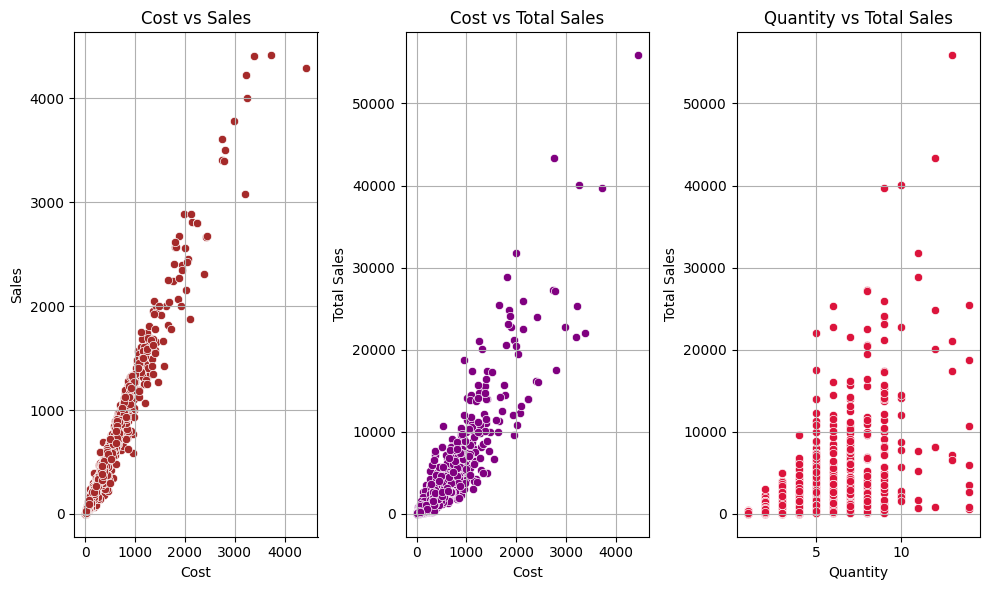

In [28]:
# Scatter plots of cost vs sales, cost vs total sales, and quantity vs total sales
fig, axes = plt.subplots(1, 3, figsize=(10,6))
plot_config = [
    ('cost', 'sales', 'Cost vs Sales', 'Cost', 'Sales', 'brown'),
    ('cost', 'total_sales', 'Cost vs Total Sales', 'Cost', 'Total Sales', 'purple'),
    ('quantity', 'total_sales', 'Quantity vs Total Sales', 'Quantity', 'Total Sales', 'crimson')
]
for i, (x_var, y_var, title, x_label, y_label, color) in enumerate(plot_config):
    sns.scatterplot(x=x_var, y=y_var, data=df, ax=axes[i], color=color)
    axes[i].set_title(title)
    axes[i].set_xlabel(x_label)
    axes[i].set_ylabel(y_label)
    axes[i].grid(True)
plt.tight_layout()
plt.show()

In [39]:
from scipy import stats

# Calculate Z-scores for 'total_sales'
df['sales_zscore'] = stats.zscore(df['total_sales'])

# Identify outliers where Z-score is greater than 3 or less than -3
outliers = df[(df['sales_zscore'] > 3) | (df['sales_zscore'] < -3)]

# Display outliers
print(outliers[['order_date', 'sales', 'total_sales', 'sales_zscore']])

     order_date     sales  total_sales  sales_zscore
4    2014-06-09  1706.184    15355.656      3.446121
7    2015-09-17  3083.430    21584.010      5.031778
35   2016-12-05  1951.840    15614.720      3.512075
37   2014-09-08  1740.060    15660.540      3.523740
56   2014-06-01  2001.860    14013.020      3.104303
85   2017-12-08  1336.829    17378.777      3.961181
195  2017-11-28  2065.320    24783.840      5.846413
210  2015-12-21  1618.370    21038.810      4.892977
238  2014-12-20  2244.480    15711.360      3.536678
259  2014-12-12  3610.848    43330.176     10.568066
301  2014-12-19  1819.860    25478.040      6.023147
352  2015-07-13  1931.040    17379.360      3.961329
366  2014-12-01  2807.840    22462.720      5.255486
530  2017-11-01  2665.620    23990.580      5.644459
598  2017-05-19  1628.820    14659.380      3.268858
649  2017-09-11  2054.272    16434.176      3.720698
723  2015-09-24  1408.100    14081.000      3.121610
750  2016-07-25  2430.080    19440.640      4.

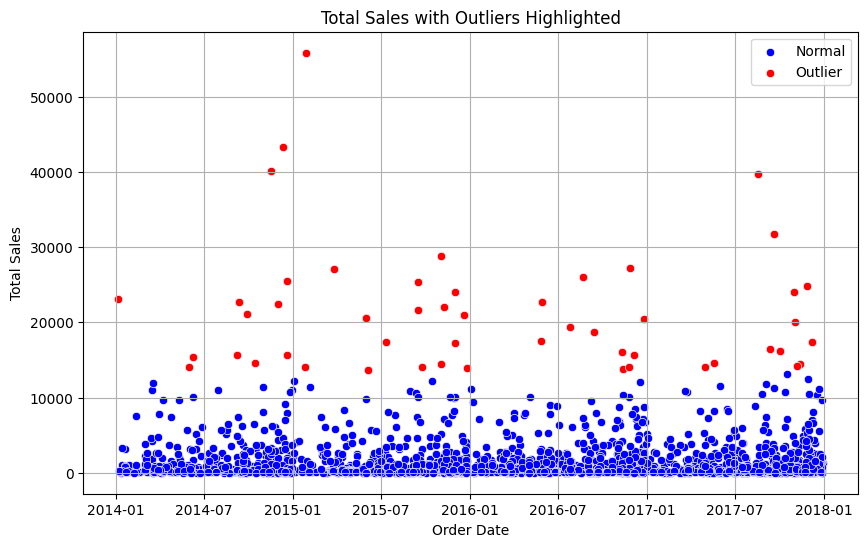

In [40]:
# Visualize outliers in a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='order_date', y='total_sales', data=df, color='blue', label='Normal')
sns.scatterplot(x='order_date', y='total_sales', data=outliers, color='red', label='Outlier')
plt.title('Total Sales with Outliers Highlighted')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
# Identificar outliers usando Z-score
df['sales_zscore'] = stats.zscore(df['total_sales'])
outliers = df[(df['sales_zscore'] > 3) | (df['sales_zscore'] < -3)]

# Eliminar outliers
df_no_outliers = df[(df['sales_zscore'] <= 3) & (df['sales_zscore'] >= -3)]

print(f"Original data points: {len(df)}")
print(f"Data points after removing outliers: {len(df_no_outliers)}")

Original data points: 2121
Data points after removing outliers: 2070


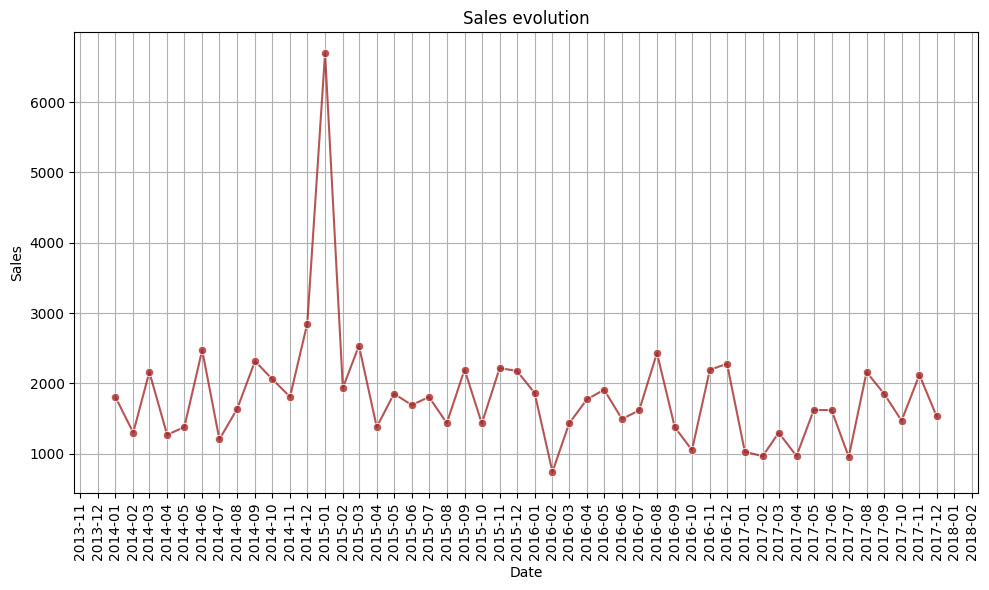

In [29]:
# Line plot of sales evolution over time
import matplotlib.dates as mdates
df_ym = df.sort_values(by='order_year_month')
plt.figure(figsize=(10,6))
sns.lineplot(x='order_year_month', y='total_sales', data=df_ym, errorbar=None, marker='o', color='brown', alpha=0.8)
plt.title('Sales evolution')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

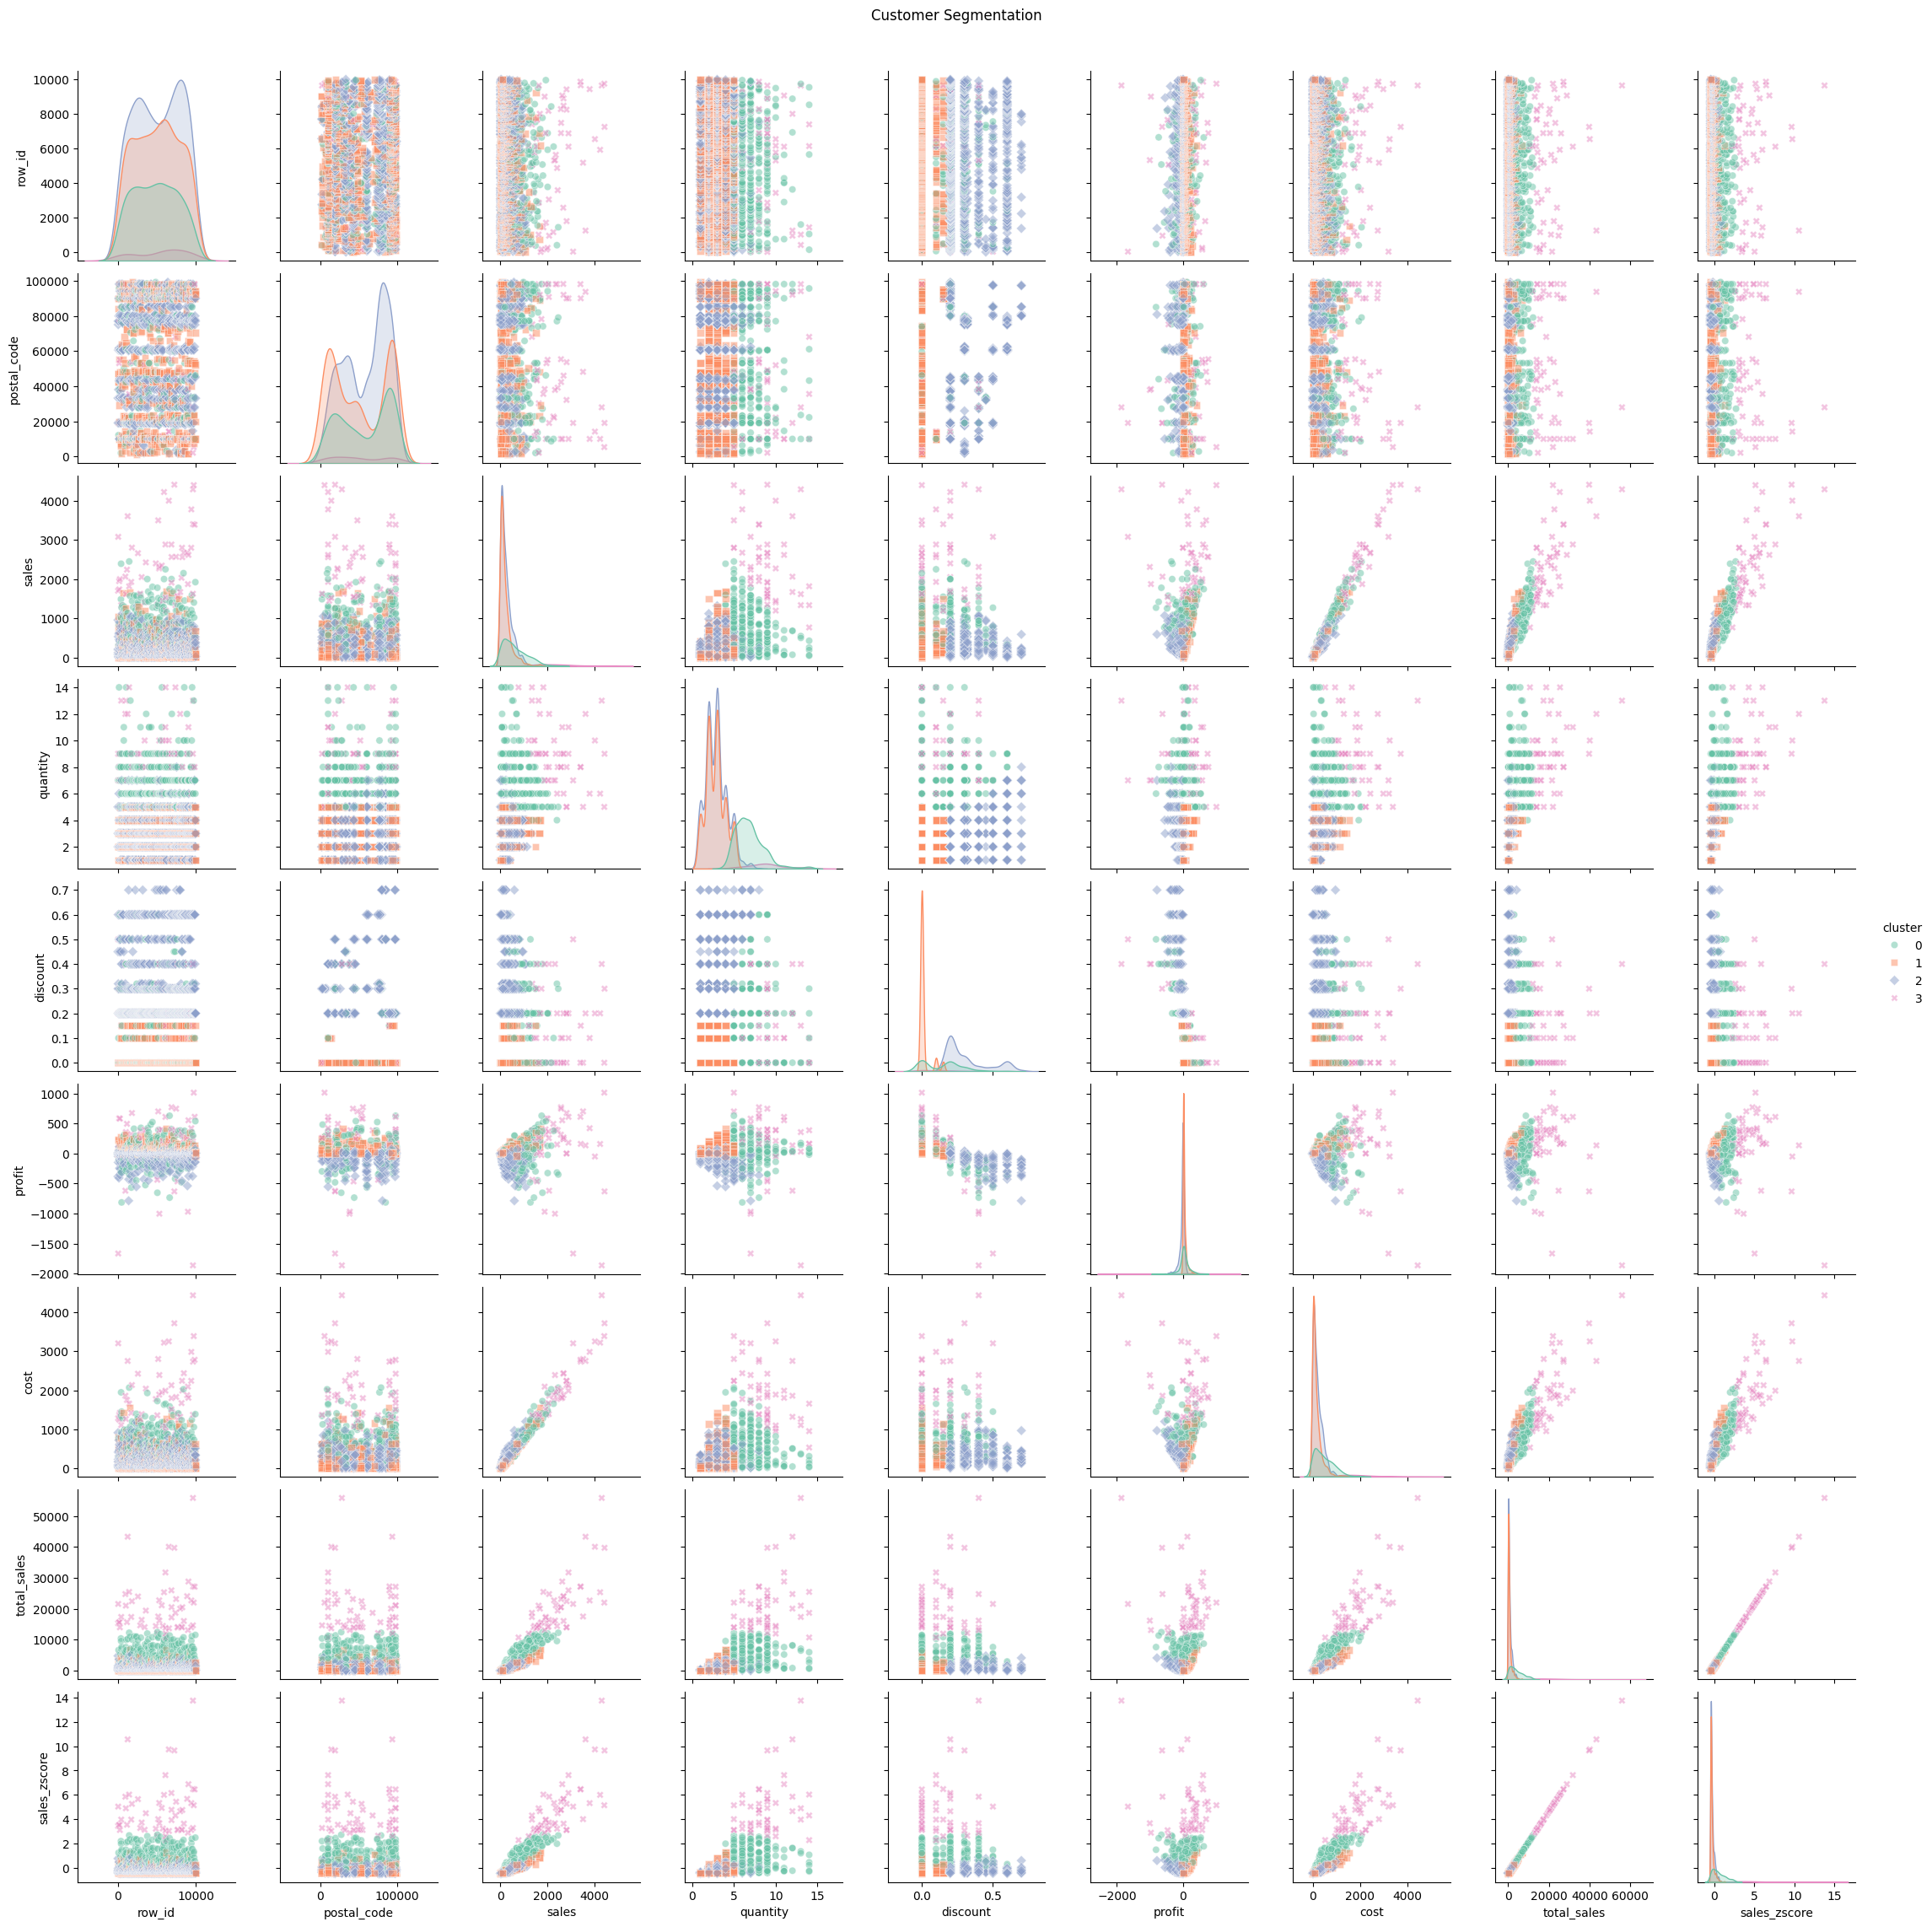

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecting features for clustering
features = df[['total_sales', 'quantity', 'discount']]
features_scaled = StandardScaler().fit_transform(features)

# Applying K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)

# Visualize the clusters in a pairplot with consistent markers
markers = ['o', 's', 'D', 'X']  # Use filled markers
sns.pairplot(df, hue='cluster', palette='Set2', markers=markers, plot_kws={'alpha': 0.5})
plt.suptitle('Customer Segmentation', y=1.02)
plt.show()

In [43]:
# Analyze cluster centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features.columns)
print(centroids)

   total_sales  quantity  discount
0     0.538639  1.373621 -0.151566
1    -0.310623 -0.436845 -0.882248
2    -0.274643 -0.393964  0.784638
3     4.779791  2.292422 -0.239989


## Forecast w/FB Prophet

In [30]:
# Get the date of the last record
print(max(df['order_date']))

2017-12-30 00:00:00


In [31]:
# Forecasting future sales using Prophet
from prophet import Prophet
dfp = df[['order_date', 'total_sales']].rename(columns={'order_date':'ds', 'total_sales':'y'})
model = Prophet()
model.fit(dfp)
future_dates = model.make_future_dataframe(periods=90)
forecast = model.predict(future_dates)
forecast = forecast[forecast['ds'] >= '2017-12-31']
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

15:55:56 - cmdstanpy - INFO - Chain [1] start processing
15:55:57 - cmdstanpy - INFO - Chain [1] done processing


            ds         yhat   yhat_lower   yhat_upper
889 2017-12-31  1783.674388 -3034.350722  6801.613019
890 2018-01-01  2240.713677 -2991.141102  7178.952655
891 2018-01-02  2030.304329 -2761.809081  7082.181956
892 2018-01-03  2859.080070 -2299.172440  7785.775966
893 2018-01-04  2041.283436 -2953.343791  6788.577127
..         ...          ...          ...          ...
974 2018-03-26  1848.022685 -2911.711505  7024.226785
975 2018-03-27  1589.976587 -3570.008834  6646.526620
976 2018-03-28  2367.282921 -2515.807379  7153.317347
977 2018-03-29  1495.979436 -3654.081742  6810.266526
978 2018-03-30  1477.829317 -3266.328321  6632.295196

[90 rows x 4 columns]


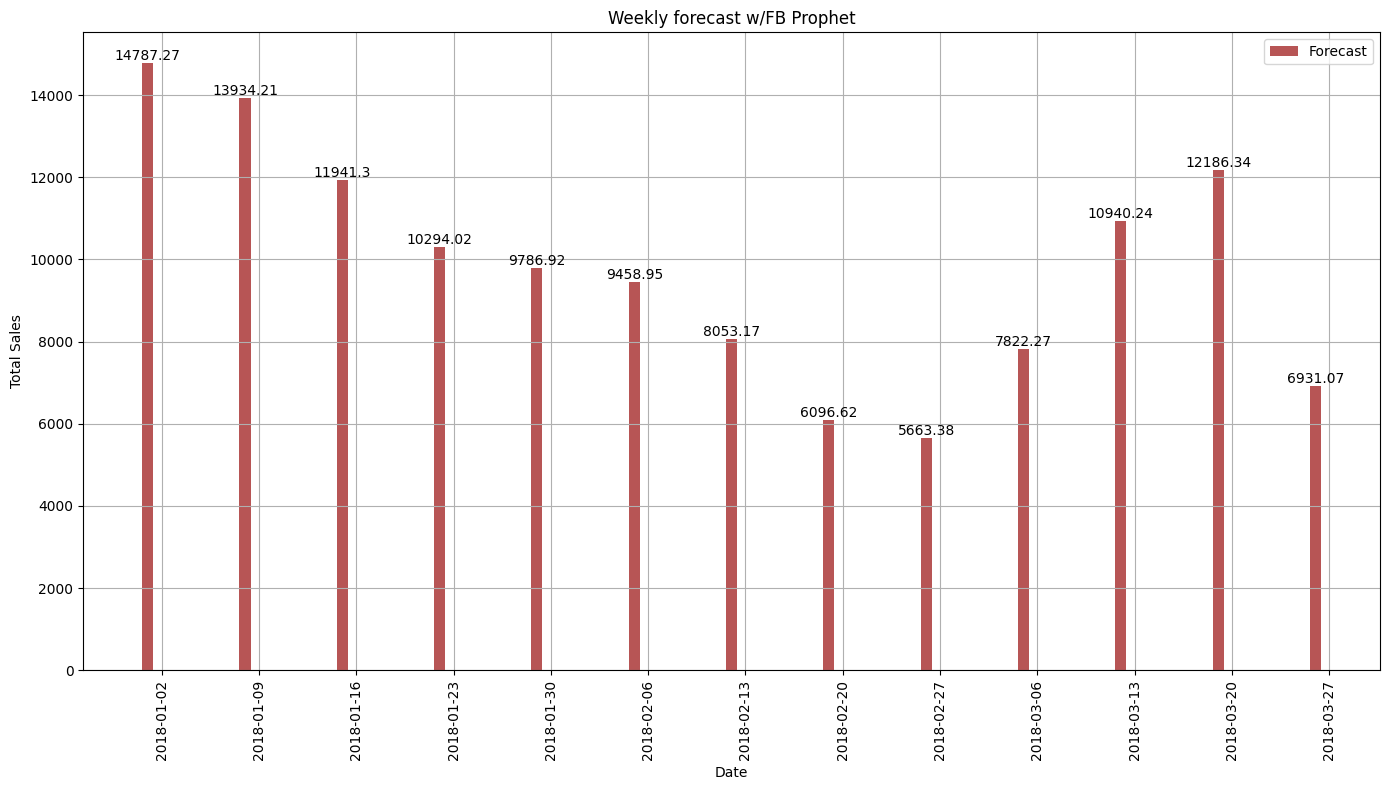

In [32]:
# Aggregating weekly forecast data
forecast['ds'] = pd.to_datetime(forecast['ds'])
forecast_weekly = forecast.resample('W-Mon', on='ds').sum().reset_index().sort_values(by='ds')
forecast_weekly['ds'] = forecast_weekly['ds'] - pd.Timedelta(days=7)
forecast_weekly_filtered = forecast_weekly[forecast_weekly['ds'] >= '2017-12-31']

# Plotting the weekly forecast results
plt.figure(figsize=(14,8))
bars = plt.bar(forecast_weekly_filtered['ds'], forecast_weekly_filtered['yhat'], label='Forecast', color='brown', alpha=0.8)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.title('Weekly forecast w/FB Prophet')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.grid(True)
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()